# Electricity market study (South Australia, 4th Q of 2019 -  complete 2020)
## Data source AEMO

### Power Analyst: Konstantin Konakov


Based on open lessons by Dmitriy Sergeyev:

https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb




#### Importing all required libraries

In [1]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Loading data as obtained from AEMO 

loading data from open source AEMO with 30 minutes interval (https://aemo.com.au/)

In [2]:

df = pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_201910_SA1.csv',
 index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] )

df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_201911_SA1.csv',
                           header = 0,  index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] ))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_201912_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] ))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202001_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] ))

df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202002_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202003_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202004_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202005_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202006_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202007_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202008_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202009_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202010_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202011_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202012_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))



print('Data loaded OK')

Data loaded OK


#### Checking the volume and types of loaded data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21984 entries, 2019-10-01 00:30:00 to 2021-01-01 00:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       21984 non-null  object 
 1   TOTALDEMAND  21984 non-null  float64
 2   RRP          21984 non-null  float64
 3   PERIODTYPE   21984 non-null  object 
dtypes: float64(2), object(2)
memory usage: 858.8+ KB


* we loaded data for 15 months: from 01-Oct 2019 till 01-Jan 2021
* there are no missing values, all 21984 readings are there for every field
* minimal memory used (less than 1 MB) so optimization of data types are not required

In [4]:
df # let us see the head and tail of data frame

,REGION,TOTALDEMAND,RRP,PERIODTYPE
SETTLEMENTDATE,,,,
2019-10-01 00:30:00,SA1,1390.99,125.19,TRADE
2019-10-01 01:00:00,SA1,1332.87,94.26,TRADE
2019-10-01 01:30:00,SA1,1273.33,86.37,TRADE
2019-10-01 02:00:00,SA1,1212.97,82.75,TRADE
2019-10-01 02:30:00,SA1,1172.38,75.38,TRADE
...,...,...,...,...
2020-12-31 22:00:00,SA1,1161.41,33.77,TRADE
2020-12-31 22:30:00,SA1,1129.06,45.56,TRADE
2020-12-31 23:00:00,SA1,1122.64,36.47,TRADE


* RRP is the price we are after
* Region and Period type do not carry meaningfull info at this stage and can be dropped after we check that they are all the same
* Total demand may be usefull for understading of general 'market temperature', let us keep these values 

In [5]:
df['REGION'].unique() # checking uniqie values in REGION field

array(['SA1'], dtype=object)

* all data are from the same region SA

In [6]:
df['PERIODTYPE'].unique() # checking uniqie values in PERIODTYPE field

array(['TRADE'], dtype=object)

* all data are from the same source - Trade platform for electric power

#### Let us check if our data are monotonic

In [7]:
if df.index.is_monotonic: # monotonic check
    print('Data are monotonic')
else:
    print('Not monotonic, sorting')
    df.sort_index(inplace=True)
    print(df.info())

Data are monotonic


* Data are loaded in accordance with the time flow

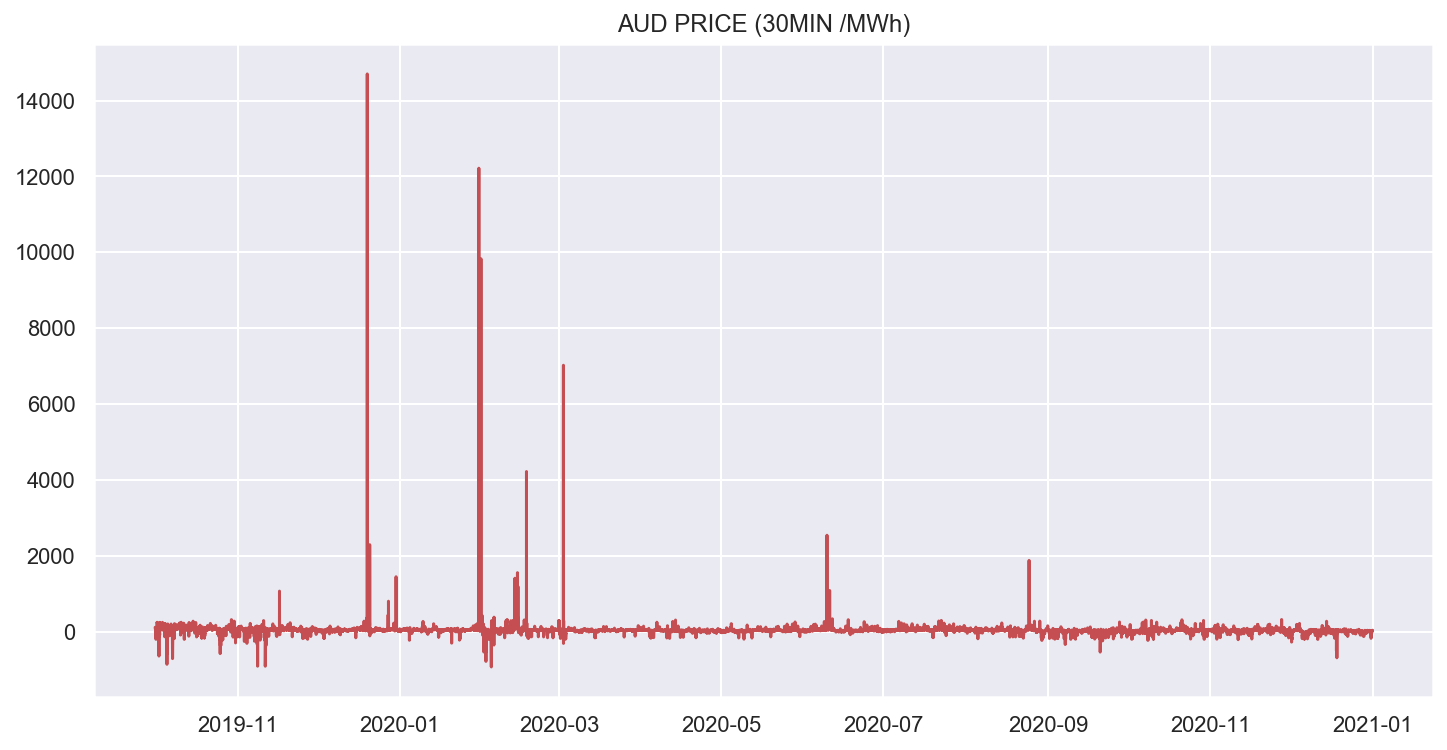

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.RRP,'r')
plt.title('AUD PRICE (30MIN /MWh)')
plt.grid(True)
plt.show()

* we can see huge price spikes both in positive and negative direction
* more spikes during Australian summer seaon - there was an extremelly hot summer


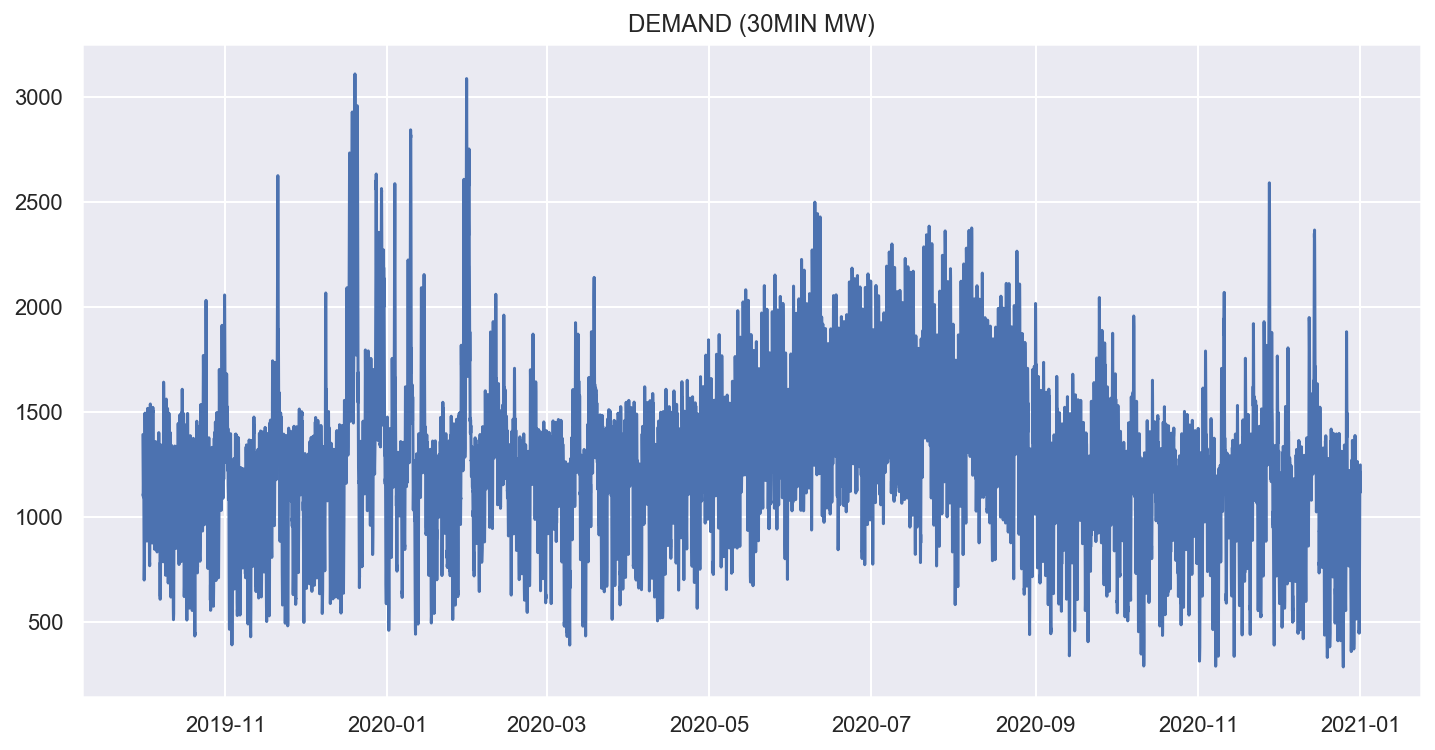

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.TOTALDEMAND)
plt.title('DEMAND (30MIN MW)')
plt.grid(True)
plt.show()

* air conditioning has caused spikes in demand too 

#### Let us zoom into the last two weeks of the year 

Readings go with 30 min interval, so we have 48 readings per day, that makes per 10 days:

In [10]:
zoomlmt = 48*10
print(zoomlmt, ' readings per decade')

480  readings per decade


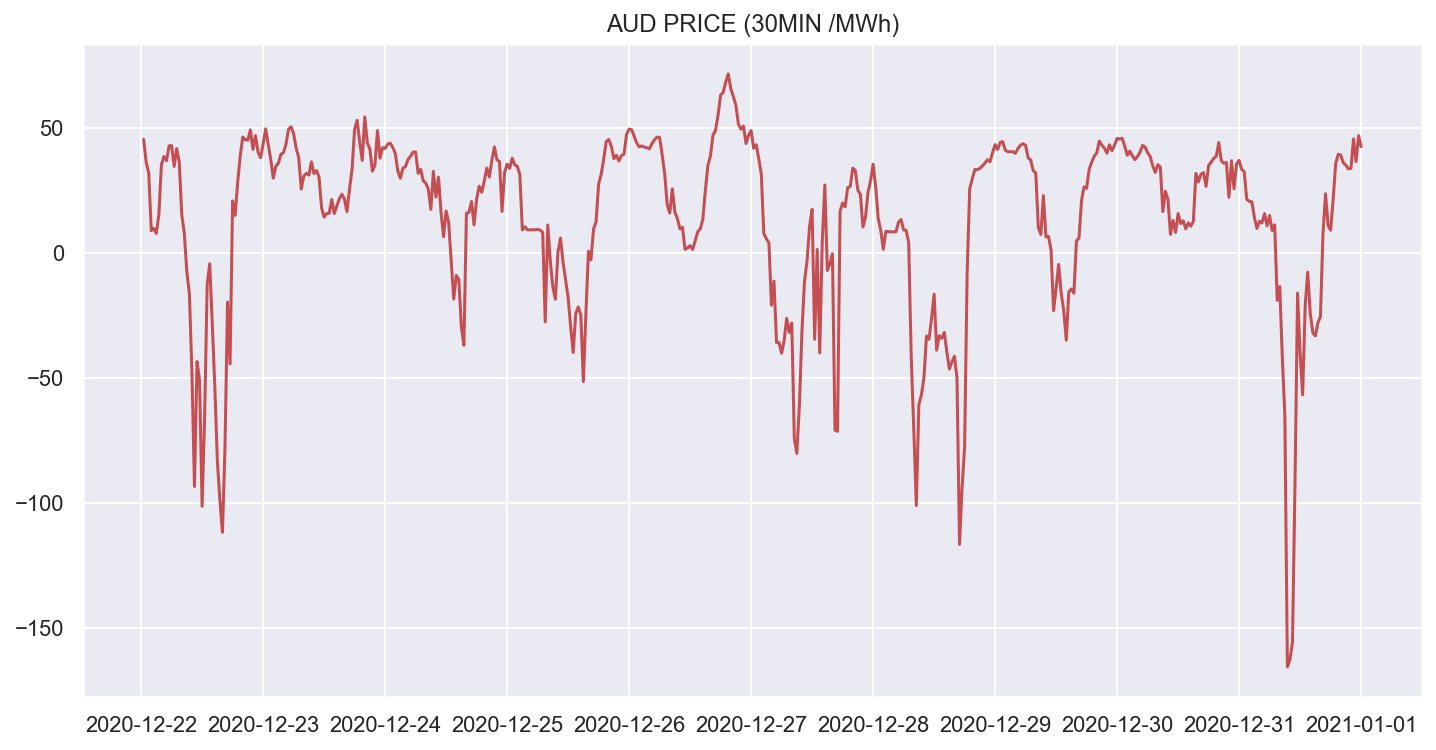

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.RRP[-zoomlmt:],'r')
plt.title('AUD PRICE (30MIN /MWh)')
plt.grid(True)
plt.show()

* we can see peridical time series with spikes of negative prices
* it can be very interesting to buy power at negative price to fill in power storage

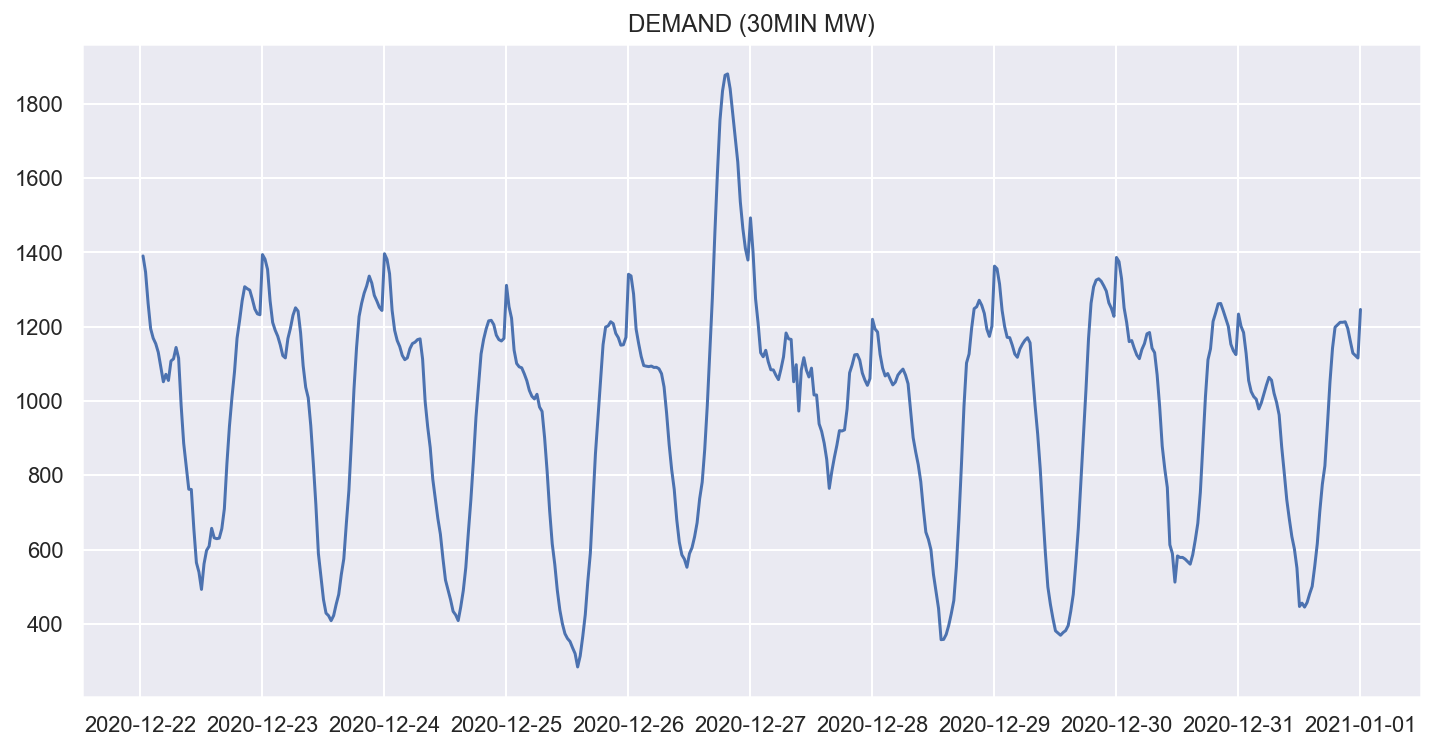

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.TOTALDEMAND[-zoomlmt:])
plt.title('DEMAND (30MIN MW)')
plt.grid(True)
plt.show()

* negative prices are happening ... (you have guessed it) ...  when demand was at minimum
* we can see that demand is more predictable than the price level on these 10 days
* interesting fact that demand is at minimum during the day? That means the data are provided in GMT that is 9:30 behind  South Australian time in December

### Let us output demand for a usual workday of 08-Dec from midnight to midnight in local time

In [13]:
df_workday = df.query('(index >= "2020-12-08 14:30:00") & (index <= "2020-12-09 14:30:00") ')

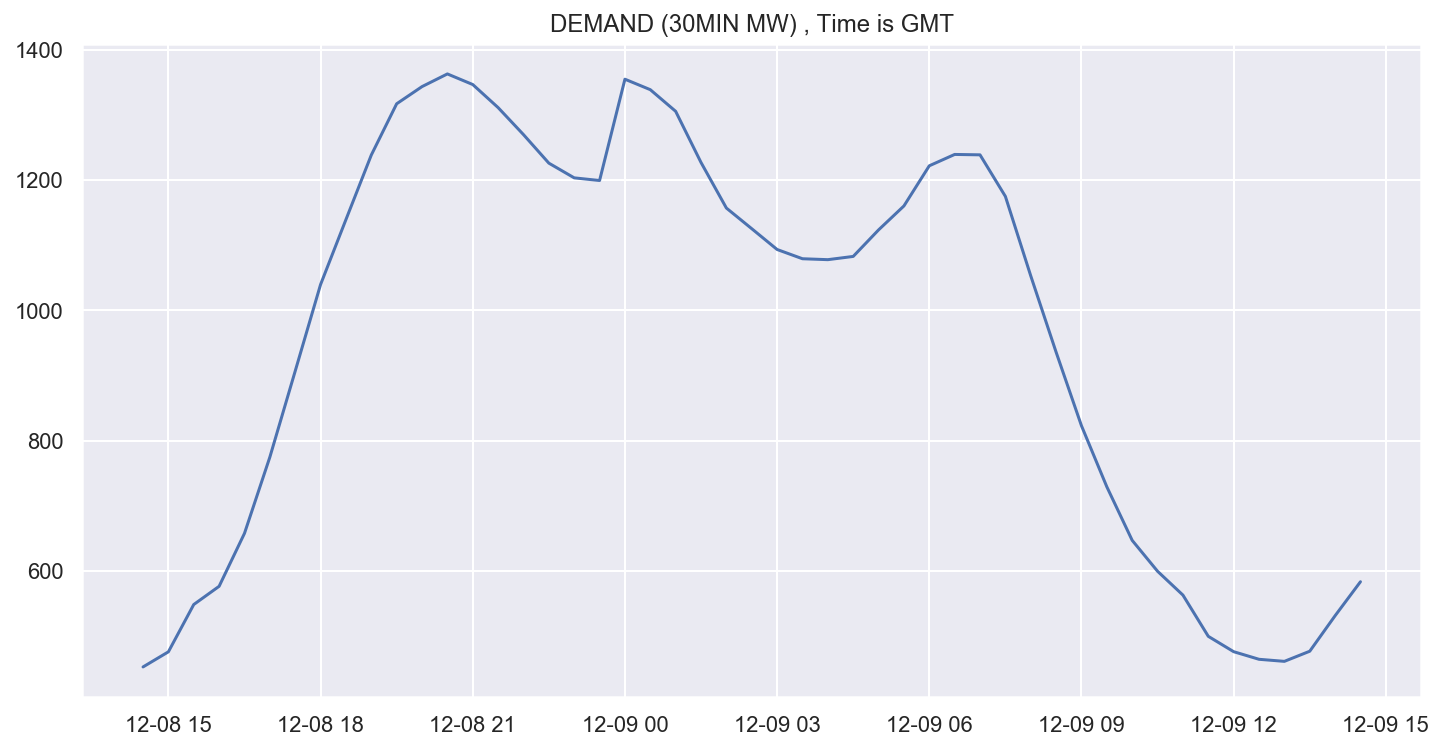

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_workday.TOTALDEMAND)
plt.title('DEMAND (30MIN MW) , Time is GMT')
plt.grid(True)
plt.show()

* we can see a standard low demand in the night, as expected
* morning, afternoon and evening peaks during the day

### Averaging the noise to see trends

Let us define function to plot averaged valuse within a given moving window

Let us study patterns of a usuall spring workweek Monday 14-Sep to Sunday 20-Sep (incuding)

In [15]:
df_workweek = df.query('(index >= "2020-09-13 14:30:00") & (index <= "2020-09-21 14:30:00") ')

In [16]:
# Importing metrics 

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

#### Let us take average for the previous 8 readings (4 hours)

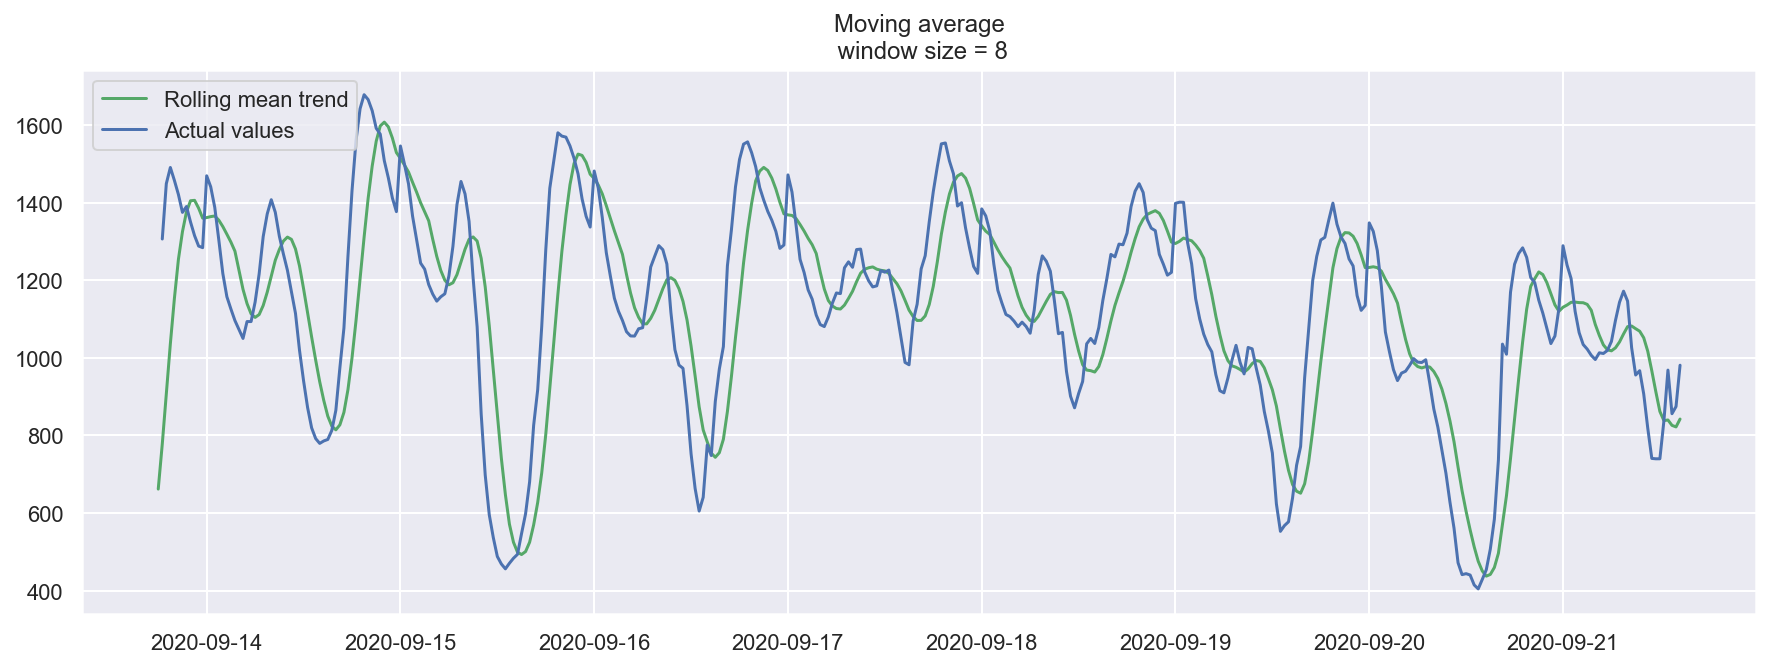

In [18]:
plotMovingAverage(df_workweek.TOTALDEMAND, 8) 

* we can see usuall pattern of intra-week demand for power

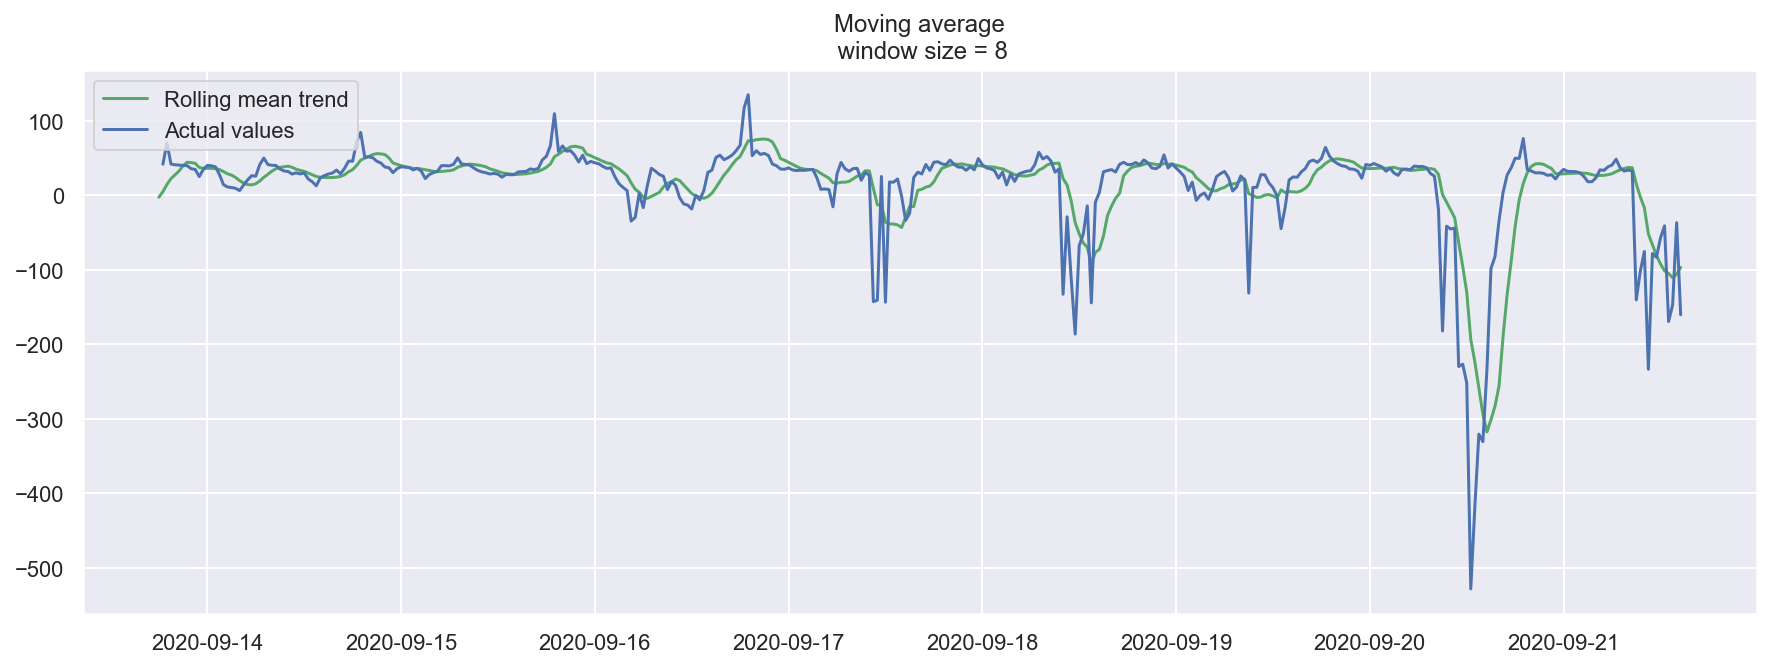

In [19]:
plotMovingAverage(df_workweek.RRP, 8) 

* Interesting that attractive negative prices were happening closer to the end of the week

#### This is the average for the previous 12 hours

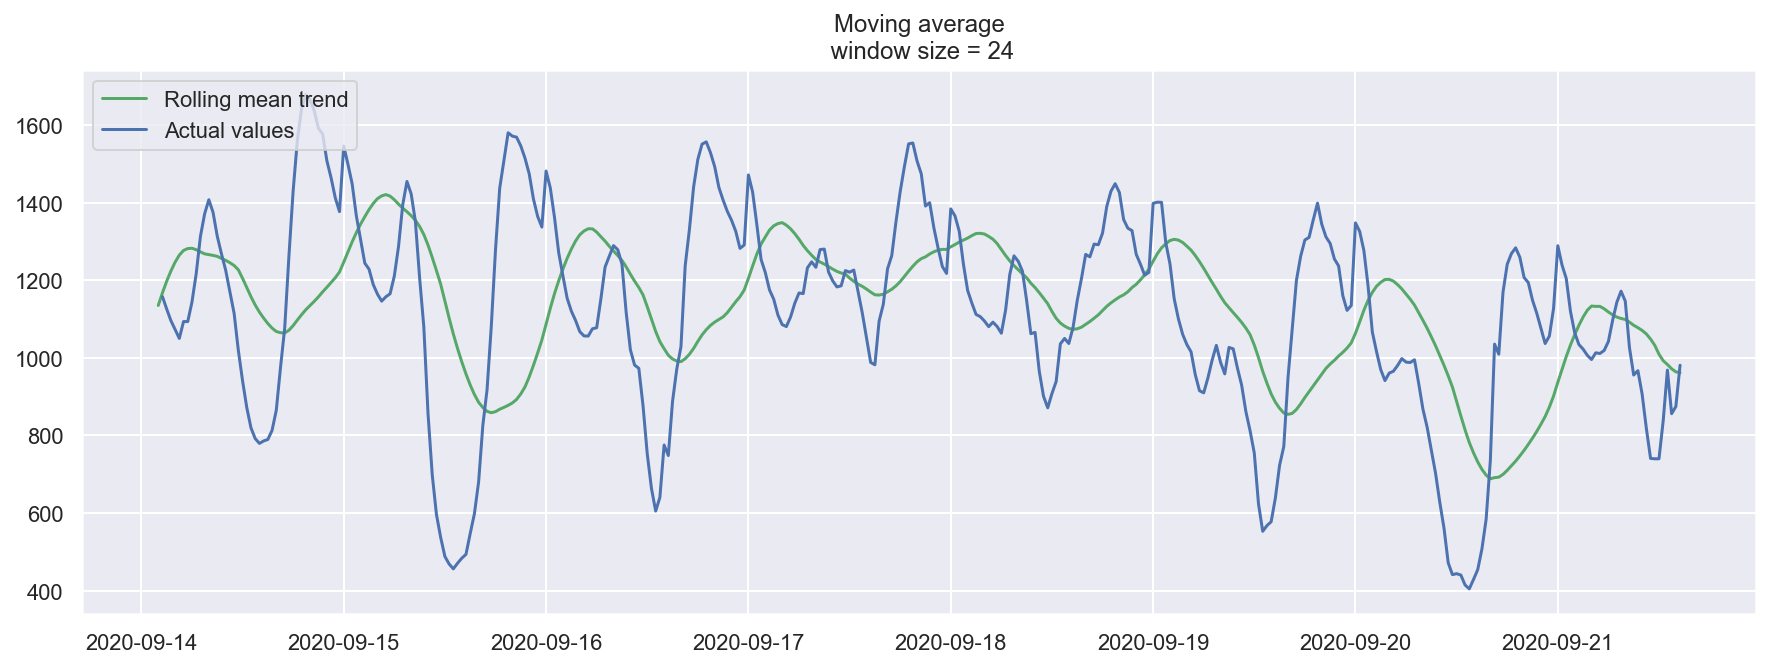

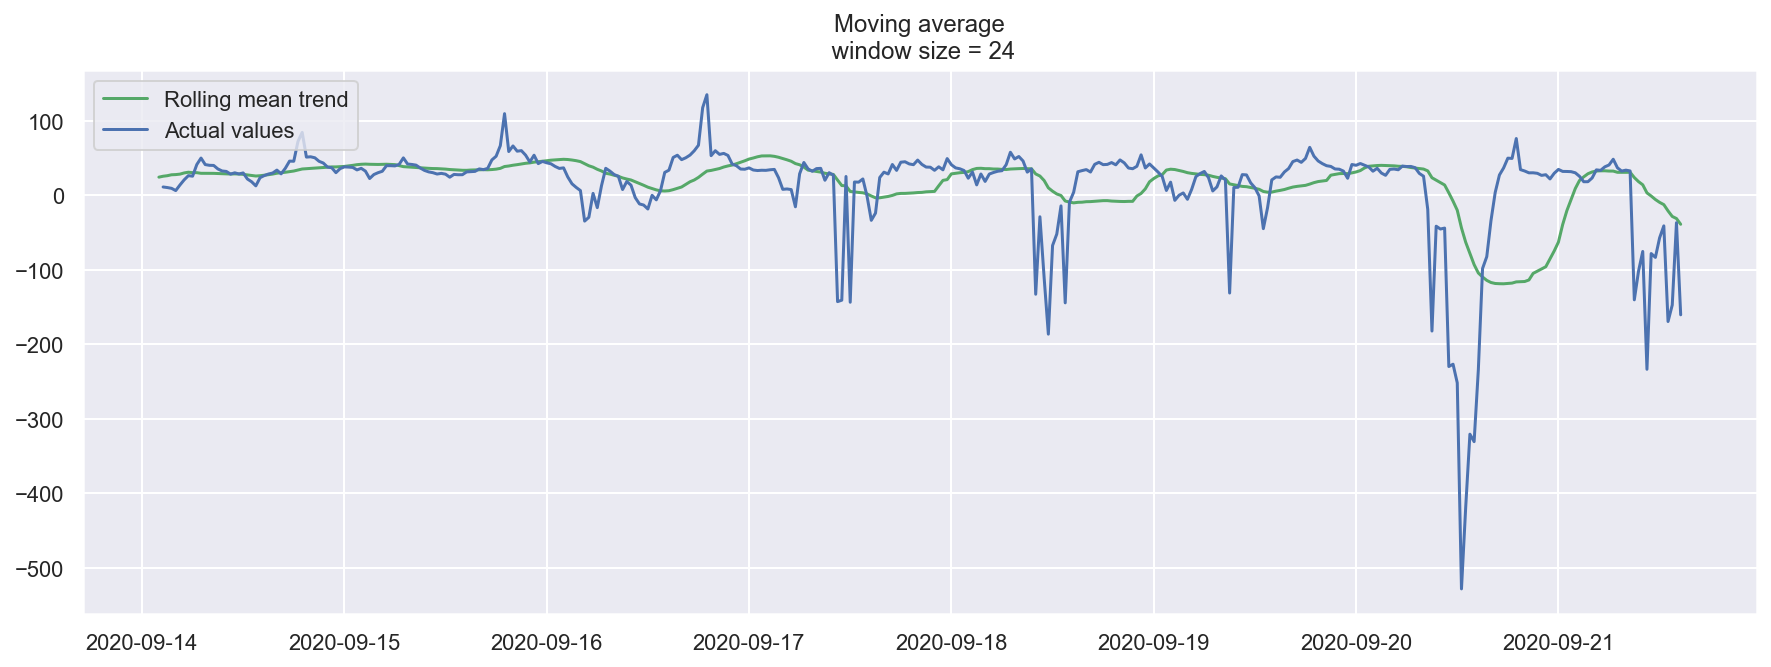

In [20]:
plotMovingAverage(df_workweek.TOTALDEMAND, 24) 
plotMovingAverage(df_workweek.RRP, 24) 

#### Now smoothing with the previous 24 hours, we get the daily trend

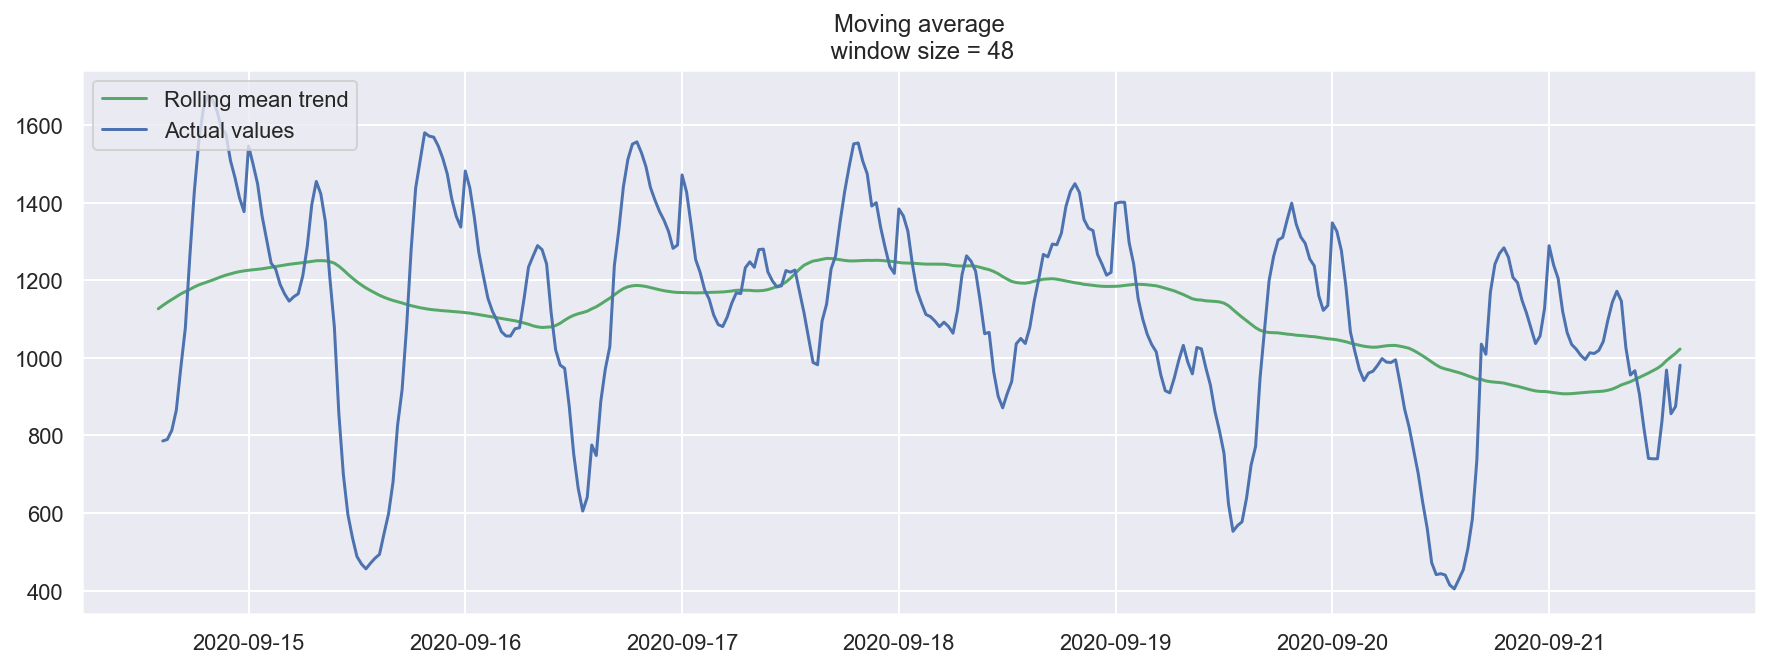

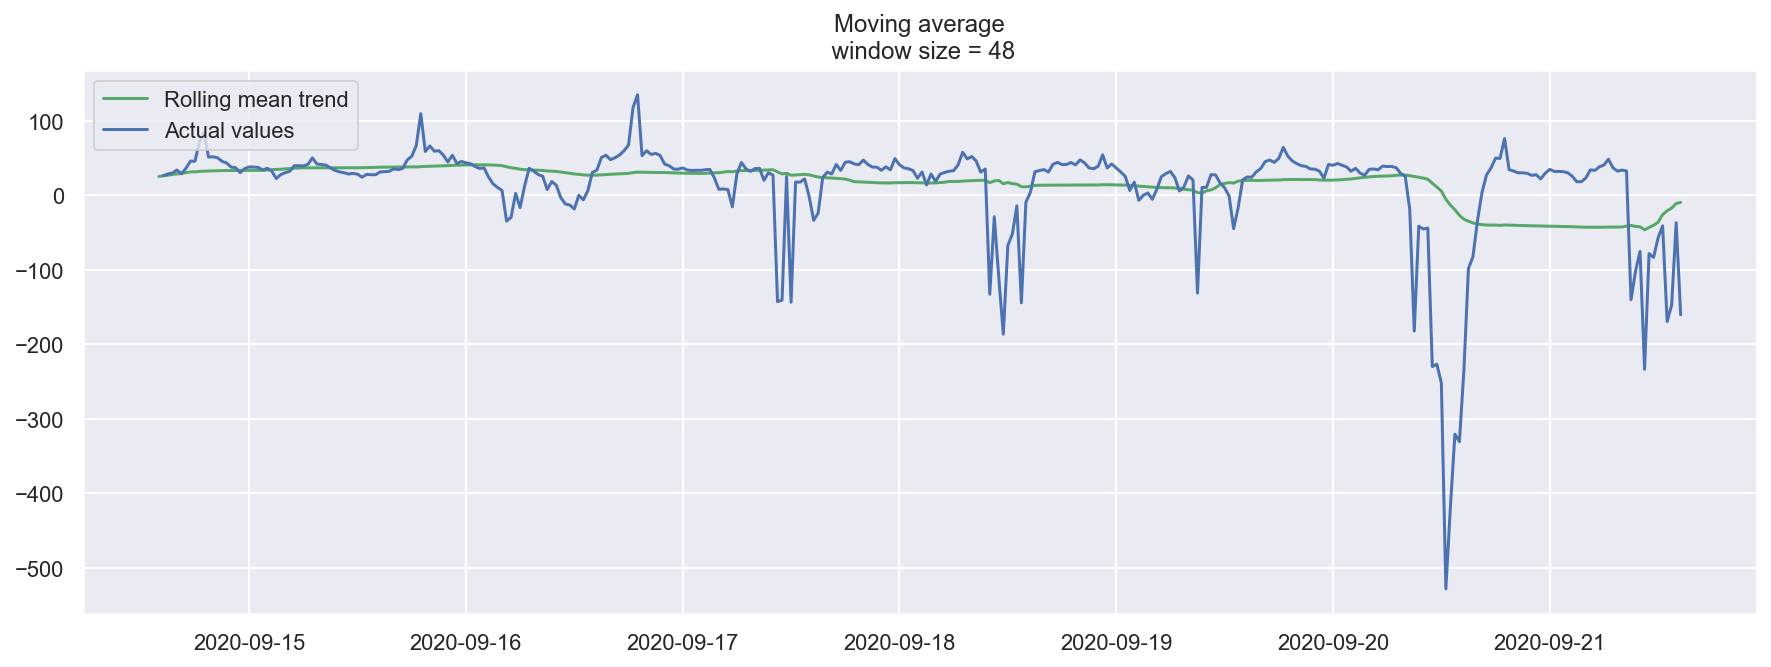

In [21]:
plotMovingAverage(df_workweek.TOTALDEMAND, 48) 
plotMovingAverage(df_workweek.RRP, 48) 

* demand trend goes down by the end of the week, but that coud be drop in temperature and less need for air conditioning

#### We can also plot confidence intervals for our smoothed values.

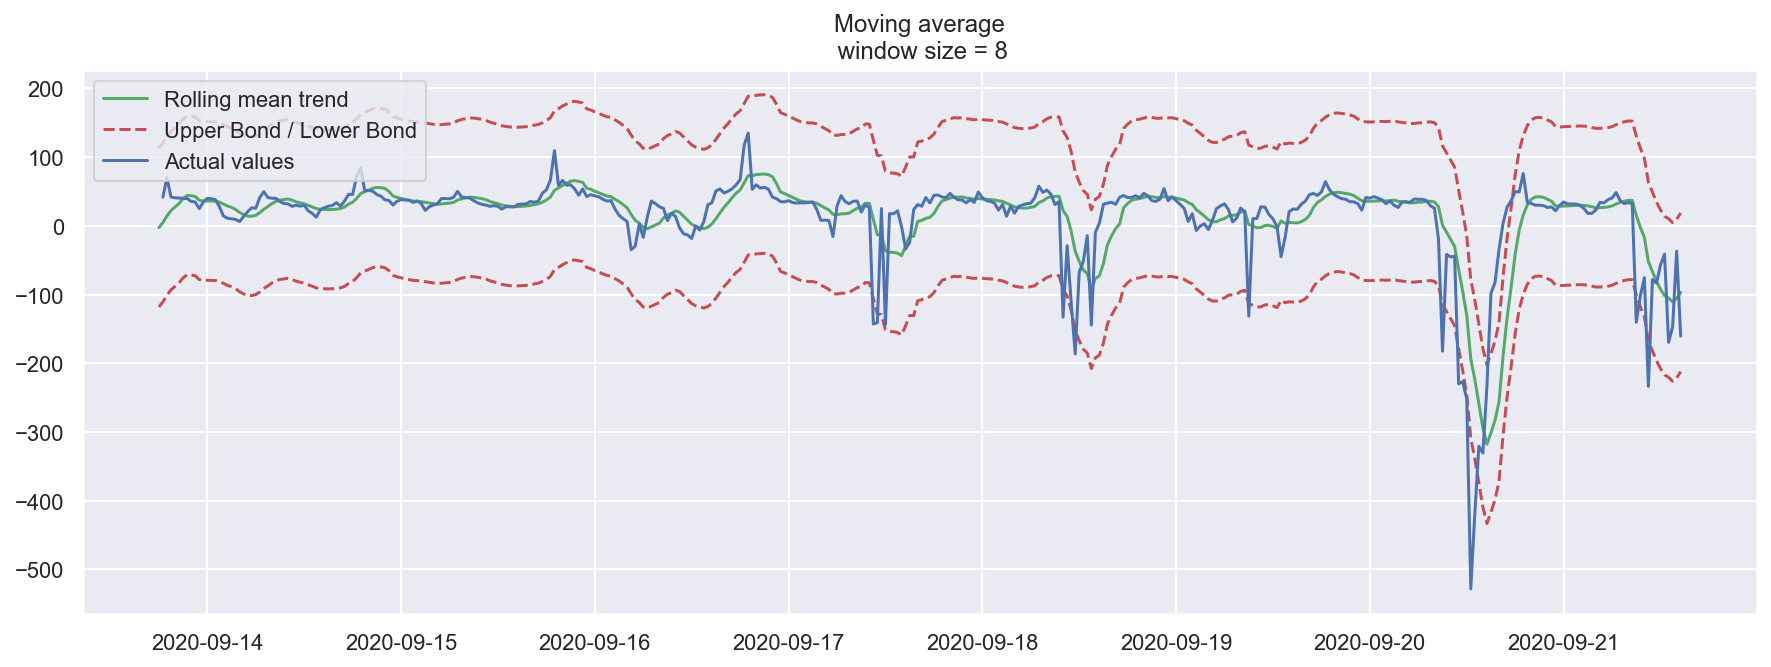

In [22]:
plotMovingAverage(df_workweek.RRP, 8, plot_intervals=True)

#### Highlighting anomalies that differ from averaged value onto more than 1.96 deviation values 

Deviation is calculated for the residuals after substracting sliding average


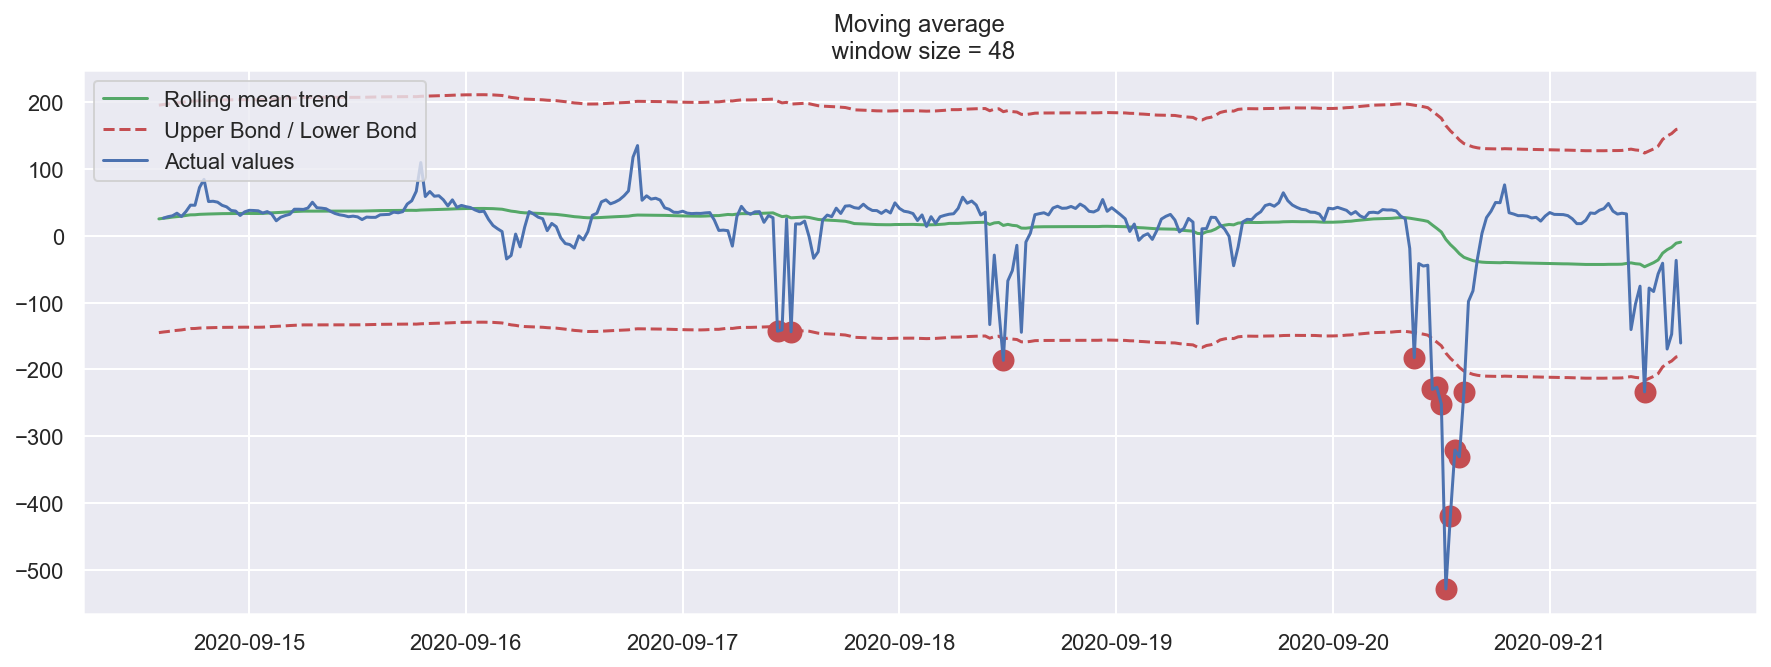

In [36]:
plotMovingAverage(df_workweek[['RRP']], 48, plot_intervals=True, scale=1.96, 
                      plot_anomalies=True)

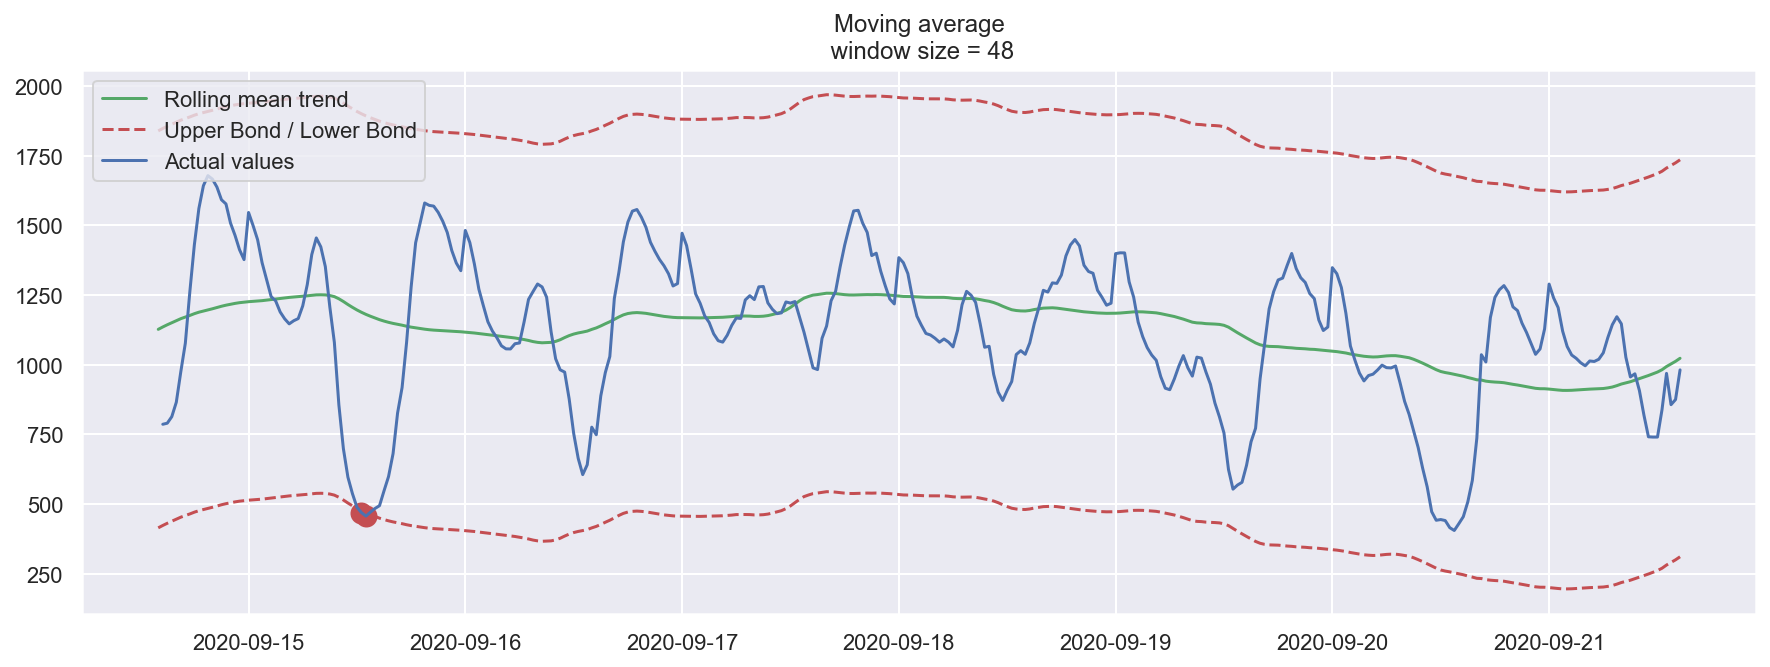

In [35]:
plotMovingAverage(df_workweek[['TOTALDEMAND']], 48, plot_intervals=True, scale=1.96, 
                      plot_anomalies=True)

* Anomaly drops in demand around Tuesday did not cause drops in price, may be generation or import of electricity was reduced too?
* plunge in price in the end of the week was caused by some external factors as well?

### Let us run anomaly detection for the complete dataset

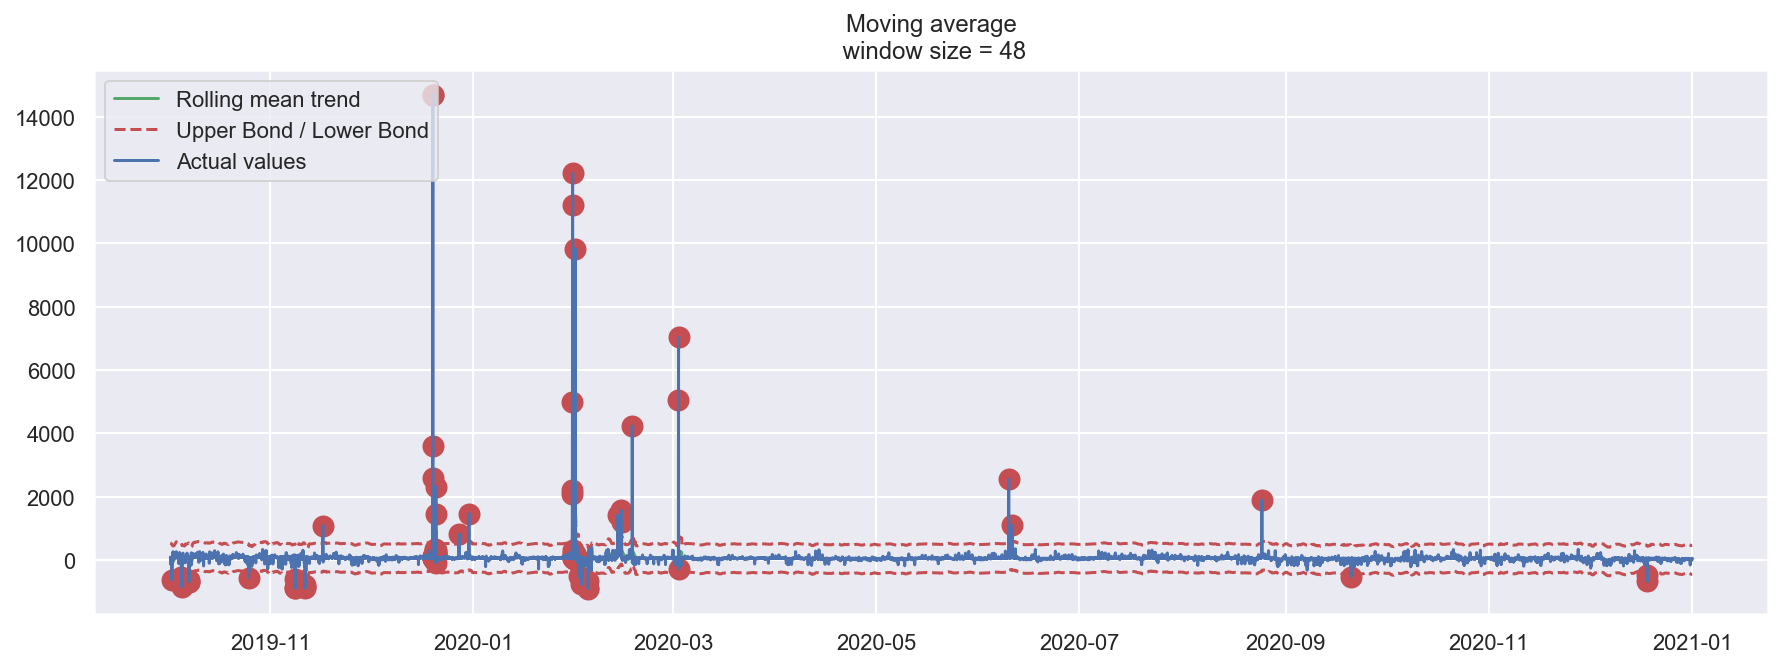

In [37]:
plotMovingAverage(df[['RRP']], 48, plot_intervals=True, scale=1.96, 
                      plot_anomalies=True)

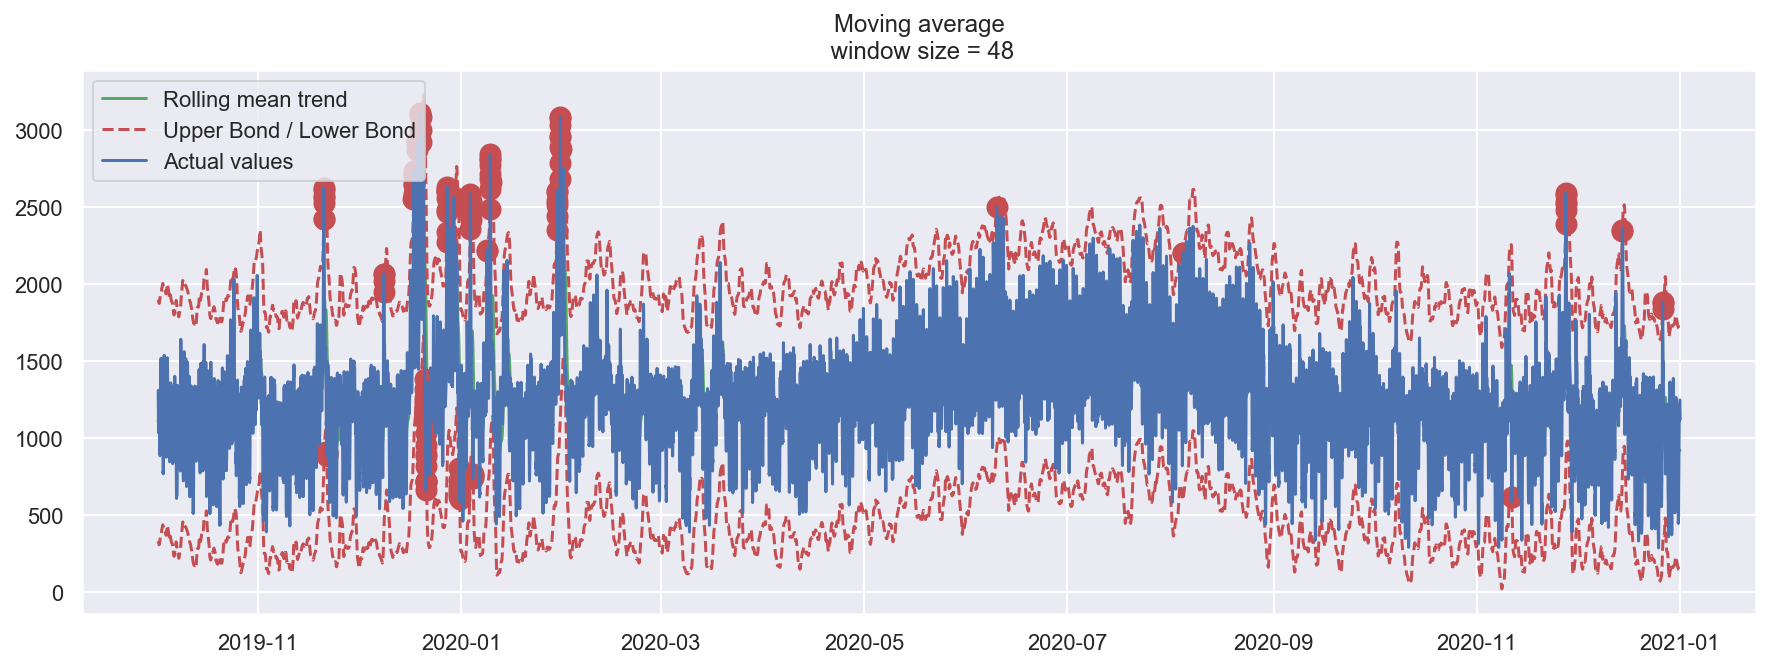

In [34]:
plotMovingAverage(df[['TOTALDEMAND']], 48, plot_intervals=True, scale=1.96, 
                      plot_anomalies=True)

* We can see sufficient peaks in demand during the hot season Dececember-February
* These drastic changes in price can help to earn premium on a arbitrage. If we can buy electricity at negative price for our LWS and sell during maximun price, we can help to balance the system and earn extra money for the LWS owner. 

# Let us put dollar values to these findnigs

How much would Lifted Weight Storage (LWS) earn if it would work in Arbitrage mode?

Peter Kropotin (EnergoZapas) has analysed data from June 2020 and offered the following LWS configuration:

* power share of LWS available for arbitrage: 267MW
* capacity share of LWS available for arbitrage: 267MWh

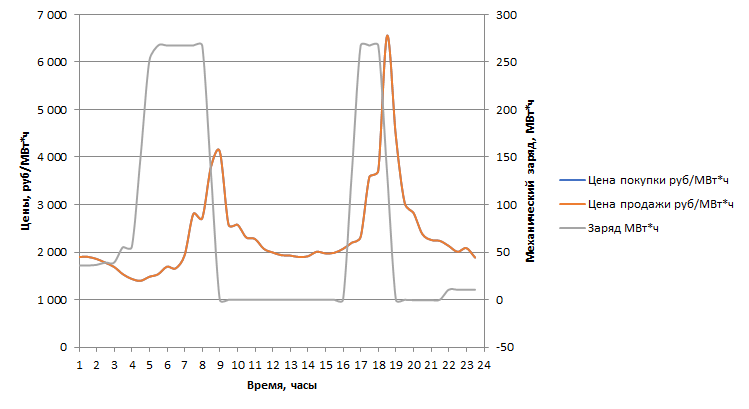

### Petr Kropotin has found optimal pattern for charging and discharding in June using gradient optimization method and MS Excell:

In [66]:
LWS_efficiency = 0.83 # known total efficiency of Lifted Weight Storage

charge_efficiency = LWS_efficiency**0.5 # charging efficiency
discharge_efficiency = LWS_efficiency**0.5 # discharging efficiency

In [119]:
# orders to charge LWS in MW of power at start of every 30min
charging_MW_per_30min = np.array([
    0,0,0,0.72816234224644,
    2.71962938664359,0,17.705857442108,0,103.296407503237,111.193679667273,
    17.7495317312967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    146.42556438994,146.434577357883,0,0,0,0,0,0,0,0,0.566340259693156,11.4397332689778,0,0,0,27.9507942616297
])*charge_efficiency
# orders to discharge LWS in MW of power at start of every 30min
discharging_MW_per_30min = np.array([
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121.540640198996,121.540712740152,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    121.540723392088,121.540604966593,0,0.391849452125229,0,0,0,0,0,0,0,0
])/discharge_efficiency

In [120]:
charging_MW_per_30min.sum()

534.0629797586104

In [121]:
discharging_MW_per_30min.sum()

534.0629801239977

In [122]:
charge_discharge_MW = charging_MW_per_30min - discharging_MW_per_30min

In [123]:
print('Number of orders per 24 hours:', len(charge_discharge_MW))

Number of orders per 24 hours: 48


In [124]:
LWS_charge_level=[]

In [125]:
level = 27.9507942616297*charge_efficiency
for i in range(len(charge_discharge_MW)):
    level+=charge_discharge_MW[i]
    print(i,level)


0 25.4643854604905
1 25.4643854604905
2 25.4643854604905
3 26.127772925877533
4 28.60547321456807
5 28.60547321456807
6 44.73627703338035
7 44.73627703338035
8 138.84378298562672
9 240.14604628856057
10 256.3166392784498
11 256.3166392784498
12 256.3166392784498
13 256.3166392784498
14 256.3166392784498
15 256.3166392784498
16 122.90845497728975
17 -10.499808948133392
18 -10.499808948133392
19 -10.499808948133392
20 -10.499808948133392
21 -10.499808948133392
22 -10.499808948133392
23 -10.499808948133392
24 -10.499808948133392
25 -10.499808948133392
26 -10.499808948133392
27 -10.499808948133392
28 -10.499808948133392
29 -10.499808948133392
30 -10.499808948133392
31 -10.499808948133392
32 122.90022891819314
33 256.3084779890992
34 256.3084779890992
35 256.3084779890992
36 122.90020237165731
37 -10.50794325691632
38 -10.50794325691632
39 -10.938053908315235
40 -10.938053908315235
41 -10.938053908315235
42 -10.422093376402252
43 -3.653872990838636e-07
44 -3.653872990838636e-07
45 -3.653872

In [39]:
np.multiply(charging_MW_per_30min, charging_MW_per_30min)

array([    0,     0,     0,     1,     9,     0,   324,     0, 10609,
       12321,   324,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0, 21316, 21316,     0,     0,
           0,     0,     0,     0,     0,     0,     1,   121,     0,
           0,     0,   784])

* one can see that LWS is charging during small hours and discharges during morning peak (gray line)
* than it charges again at 4p.m. and discharges at 6pm
* brown line shows average electricity price on that hour for 24 days in June 2020

### As the first reality-check, let us apply the same LWS charging/discharging pattern to every month in avalable data

function to calculate earnings per day

In [ ]:
LWS_earning_per_day():
    